In [1]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
import scorecardpy as sc
import numpy as np
from scipy.stats import beta
import math
from sklearn.preprocessing import LabelEncoder
import random

In [2]:
df=  pd.read_csv('credit-german.csv')
df['class'] = np.where('good' == df['class'],0, df['class'])
df['class'] = np.where('bad' == df['class'],1, df['class'])
df['Class']=df['class']
df['Class'] = df['Class'].astype(float)
df=df.drop(['class'],axis=1)

In [3]:
le = LabelEncoder()

checking_status = le.fit_transform(df['checking_status'])
df.drop('checking_status', axis=1, inplace=True)
df["checking_status"] = checking_status

credit_history = le.fit_transform(df['credit_history'])
df.drop('credit_history', axis=1, inplace=True)
df["credit_history"] = credit_history

purpose = le.fit_transform(df['purpose'])
df.drop('purpose', axis=1, inplace=True)
df["purpose"] = purpose

savings_status = le.fit_transform(df['savings_status'])
df.drop('savings_status', axis=1, inplace=True)
df["savings_status"] = savings_status

employment = le.fit_transform(df['employment'])
df.drop('employment', axis=1, inplace=True)
df["employment"] = employment

personal_status = le.fit_transform(df['personal_status'])
df.drop('personal_status', axis=1, inplace=True)
df["personal_status"] = personal_status

other_parties = le.fit_transform(df['other_parties'])
df.drop('other_parties', axis=1, inplace=True)
df["other_parties"] = other_parties

property_magnitude = le.fit_transform(df['property_magnitude'])
df.drop('property_magnitude', axis=1, inplace=True)
df["property_magnitude"] = property_magnitude

other_payment_plans = le.fit_transform(df['other_payment_plans'])
df.drop('other_payment_plans', axis=1, inplace=True)
df["other_payment_plans"] = other_payment_plans

housing = le.fit_transform(df['housing'])
df.drop('housing', axis=1, inplace=True)
df["housing"] = housing

job = le.fit_transform(df['job'])
df.drop('job', axis=1, inplace=True)
df["job"] = job

own_telephone = le.fit_transform(df['own_telephone'])
df.drop('own_telephone', axis=1, inplace=True)
df["own_telephone"] = own_telephone

foreign_worker = le.fit_transform(df['foreign_worker'])
df.drop('foreign_worker', axis=1, inplace=True)
df["foreign_worker"] = foreign_worker

In [4]:
train, test = sc.split_df(df, y = 'Class',ratio = 0.7, seed = 32491565).values()
train["index"] = range(1, len(train) + 1)
train = train.set_index("index")
test["index"] = range(1, len(test) + 1)
test = test.set_index("index")

In [5]:
y=pd.DataFrame(train['Class'])
train.drop('Class',axis=1,inplace=True)
X = train
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(X, y)

In [6]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 1.50
|   |--- feature_0 <= 31.50
|   |   |--- class: 0.0
|   |--- feature_0 >  31.50
|   |   |--- class: 1.0
|--- feature_7 >  1.50
|   |--- feature_4 <= 22.50
|   |   |--- class: 0.0
|   |--- feature_4 >  22.50
|   |   |--- class: 0.0



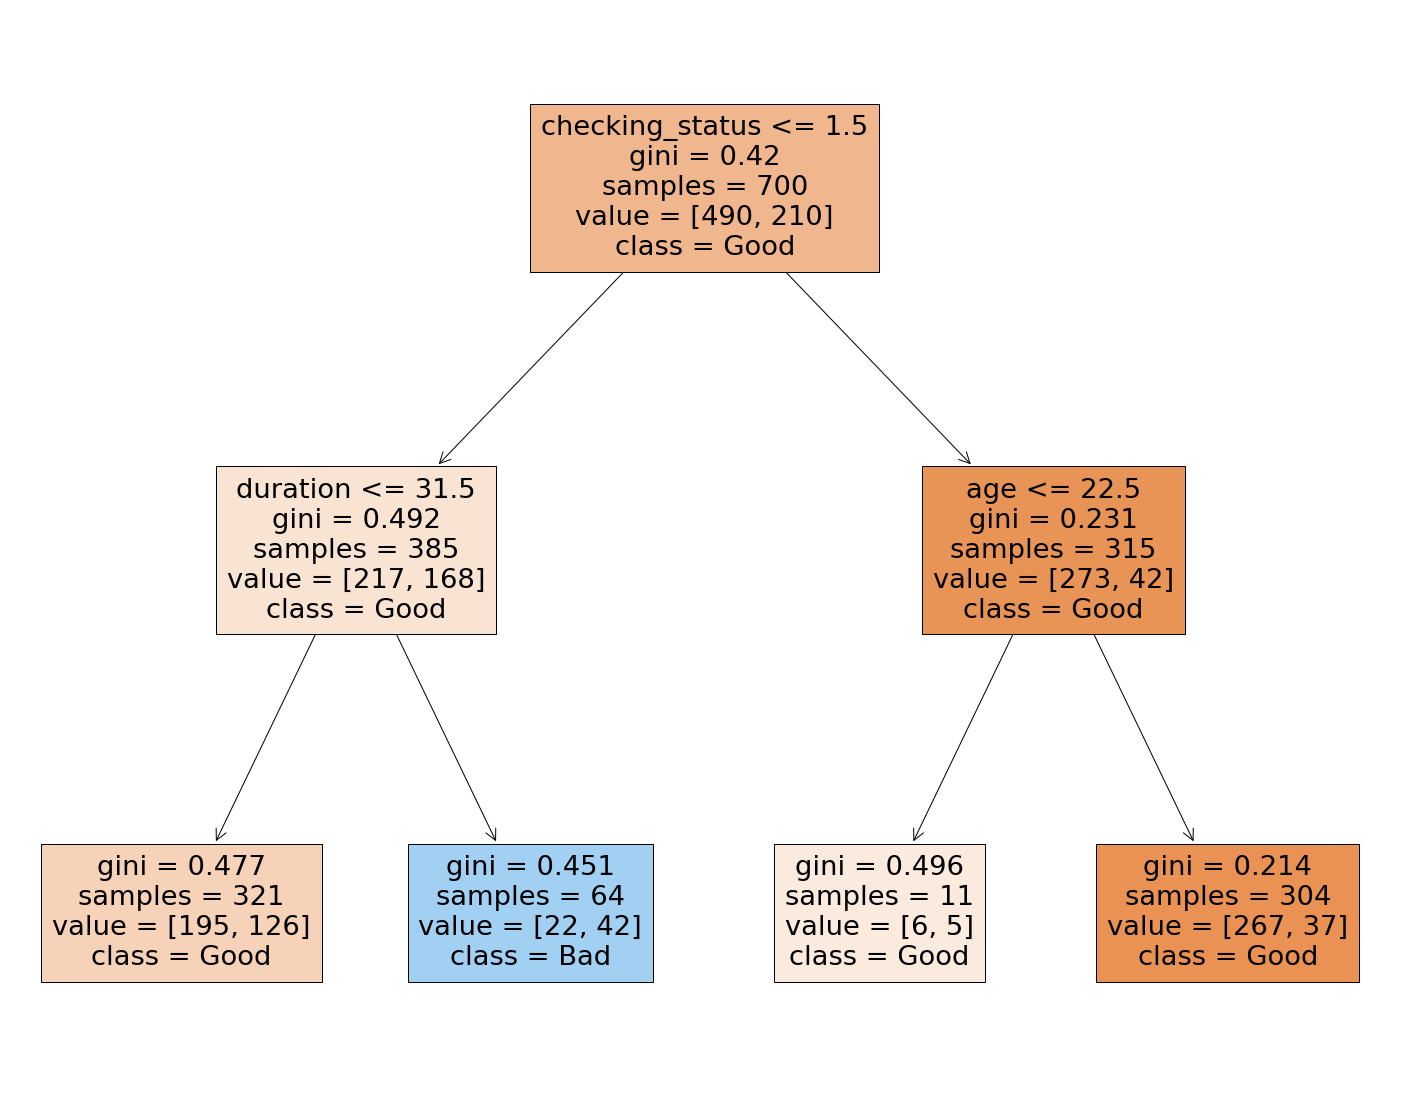

In [7]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(X.columns.values),  
                   class_names=['Good','Bad'],
                   filled=True)

In [8]:
train['Class']=y
y=train[train['checking_status']<=1.5]
y2=train[train['checking_status']>1.5]

one=y[y['duration']<=31.5]
one["index"] = range(1, len(one) + 1)
one = one.set_index("index")

two=y[y['duration']>=31.5]
two["index"] = range(1, len(two) + 1)
two = two.set_index("index")

three=y2[y2['age']<= 22.5]
three["index"] = range(1, len(three) + 1)
three = three.set_index("index")

four=y2[y2['age']>= 22.5]
four["index"] = range(1, len(four) + 1)
four = four.set_index("index")

/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30464/1066843125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one["index"] = range(1, len(one) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30464/1066843125.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two["index"] = range(1, len(two) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30464/1066843125.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [9]:
y=test[test['checking_status']<=1.5]
y2=test[test['checking_status']>1.5]

onetest=y[y['duration']<=31.5]
onetest["index"] = range(1, len(onetest) + 1)
onetest = onetest.set_index("index")

twotest=y[y['duration']>=31.5]
twotest["index"] = range(1, len(twotest) + 1)
twotest = twotest.set_index("index")

threetest=y2[y2['age']<= 22.5]
threetest["index"] = range(1, len(threetest) + 1)
threetest = threetest.set_index("index")

fourtest=y2[y2['age']>= 22.5]
fourtest["index"] = range(1, len(fourtest) + 1)
fourtest = fourtest.set_index("index")

/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30464/1816196332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onetest["index"] = range(1, len(onetest) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30464/1816196332.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twotest["index"] = range(1, len(twotest) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30464/1816196332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

# THOMPSON SAMPLING

In [10]:
alpha1,alpha2,alpha3,alpha4=0,0,0,0
beta1,beta2,beta3,beta4=0,0,0,0

betad1=random.betavariate(alpha1+1,beta1+1)
betad2=random.betavariate(alpha2+1,beta2+1)
betad3=random.betavariate(alpha3+1,beta3+1)
betad4=random.betavariate(alpha4+1,beta4+1)

tsreward=[]
reward=0

for val in range(1,12,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad3':betad3,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1 
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(12,65,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(65,305,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
 
for val in range(305,322,1):
    chosencustomer=''
    customer1=one.loc[val]
    
    dictofbeta={'betad1':betad1}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   

    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)

In [11]:
testprofitts=[]
for val in range(1,7,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad3':betad3,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1 
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(7,46,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(46,114,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
 
for val in range(114,137,1):
    chosencustomer=''
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1   

    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    
    betad4=random.betavariate(alpha4+1,beta4+1)

In [12]:
print(betad1,betad2,betad3,betad4)

0.6862671600997649 0.08850092151216266 0.6378161782916401 0.8604402101778819


In [13]:
ts=pd.DataFrame()
ts['reward']=tsreward
ts['cum_reward']=ts['reward'].cumsum()
ts["index"] = range(1, len(ts) + 1)
ts = ts.set_index("index")
ts['average_reward']=ts['cum_reward']/range(1, len(ts) + 1)

# GREEDY

In [40]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0

greward=[]
reward=0

for val in range(1,12,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward)  
    
for val in range(12,65,1):   
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward= -1
    else:
        reward=1
    
    greward.append(reward)  
    
for val in range(65,305,1):    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward) 

for val in range(305,322,1):
    chosencustomer=''
    customer1=one.loc[val]

    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1   
    
    dictofbeta={'actionval1':actionval1}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward) 

In [41]:
profit=0
gprofit=[]
for val in range(1,7,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)  
    
for val in range(7,46,1):   
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)  
    
for val in range(46,114,1):    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)  

for val in range(114,137,1):
    chosencustomer=''
    customer4=fourtest.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4
    
    dictofbeta={'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1
  
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)  

In [42]:
print(actionval1,actionval2,actionval3,actionval4)

0.21478060046189376 0 0 0.8181818181818182


In [43]:
g=pd.DataFrame()
g['reward']=greward
g['cum_reward']=g['reward'].cumsum()

g["index"] = range(1, len(g) + 1)
g = g.set_index("index")

g['average_reward']=g['cum_reward']/range(1, len(g) + 1)

# E-GREEDY

In [18]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0.1

egreward=[]
reward=0

for val in range(1,12,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(12,65,1):   
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(65,305,1):    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)      
    
for val in range(305,322,1):
    chosencustomer=''
    customer1=one.loc[val]

    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1   
    
    dictofbeta={'actionval1':actionval1}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward) 

In [19]:
eprofit1=[]
profit=0
profit=0
gprofit=[]
for val in range(1,7,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)  
    
for val in range(7,46,1):   
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)  
    
for val in range(46,114,1):    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)  

for val in range(114,137,1):
    chosencustomer=''
    customer4=fourtest.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4
    
    dictofbeta={'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1
  
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)  

In [20]:
print(actionval1,actionval2,actionval3,actionval4)

0.36082474226804123 -0.6666666666666666 0 0.7337110481586402


In [21]:
eg=pd.DataFrame()
eg['reward']=egreward
eg['cum_reward']=eg['reward'].cumsum()

eg["index"] = range(1, len(eg) + 1)
eg = eg.set_index("index")

eg['average_reward-0.1']=eg['cum_reward']/range(1, len(eg) + 1)

In [22]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0.01

egreward=[]
reward=0

for val in range(1,12,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(12,65,1):   
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(65,305,1):    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)

for val in range(305,322,1):
    chosencustomer=''
    customer1=one.loc[val]

    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1   
    
    dictofbeta={'actionval1':actionval1}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward) 

In [23]:
eprofit2=[]
profit=0
profit=0
gprofit=[]
for val in range(1,7,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)  
    
for val in range(7,46,1):   
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)  
    
for val in range(46,114,1):    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)  

for val in range(114,137,1):
    chosencustomer=''
    customer4=fourtest.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4
    
    dictofbeta={'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1
  
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)  

In [24]:
print(actionval1,actionval2,actionval3,actionval4)

0.3333333333333333 -1.0 0 0.7253731343283583


In [25]:
eg['reward']=egreward
eg['cum_reward']=eg['reward'].cumsum()

eg["index"] = range(1, len(eg) + 1)
eg = eg.set_index("index")

eg['average_reward-0.01']=eg['cum_reward']/range(1, len(eg) + 1)

# UCB

In [26]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0

ucbreward=[]
reward=0

c=2

for val in range(1,12,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)    
for val in range(12,65,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(65,305,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(305,322,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    actionval1= average1+deno1

    dictofbeta={'actionval1':actionval1}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)  

In [27]:
ucbprofit1=[]
profit=0
for val in range(1,7,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward) 
    
for val in range(7,46,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward)  
    
for val in range(46,114,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward)    
    
for val in range(114,137,1):
    
    chosencustomer=''
    customer4=fourtest.loc[val]
    
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4
        deno4=c*(math.sqrt(math.log(val)/count4))

    actionval4= average4+deno4

    dictofbeta={'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1   
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward) 

In [28]:
print(actionval1,actionval2,actionval3,actionval4)

0.42375672137169196 0 0 1.7632796857197452


In [29]:
ucb=pd.DataFrame()
ucb['reward']=ucbreward
ucb['cum_reward']=ucb['reward'].cumsum()

ucb["index"] = range(1, len(ucb) + 1)
ucb = ucb.set_index("index")

ucb['average_reward2']=ucb['cum_reward']/range(1, len(ucb) + 1)

In [30]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0

ucbreward=[]
reward=0

c=1

for val in range(1,12,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)    
for val in range(12,65,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(65,305,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(305,322,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    actionval1= average1+deno1

    dictofbeta={'actionval1':actionval1}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)  


In [31]:
ucbprofit2=[]
profit=0
for val in range(1,7,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward) 
    
for val in range(7,46,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward)  
    
for val in range(46,114,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward)    
    
for val in range(114,137,1):
    
    chosencustomer=''
    customer4=fourtest.loc[val]
    
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4
        deno4=c*(math.sqrt(math.log(val)/count4))

    actionval4= average4+deno4

    dictofbeta={'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1   
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward) 

In [32]:
print(actionval1,actionval2,actionval3,actionval4)

0.31926866091679285 0 0 1.2907307519507816


In [33]:
ucb['reward']=ucbreward
ucb['cum_reward']=ucb['reward'].cumsum()

ucb["index"] = range(1, len(ucb) + 1)
ucb = ucb.set_index("index")

ucb['average_reward1']=ucb['cum_reward']/range(1, len(ucb) + 1)

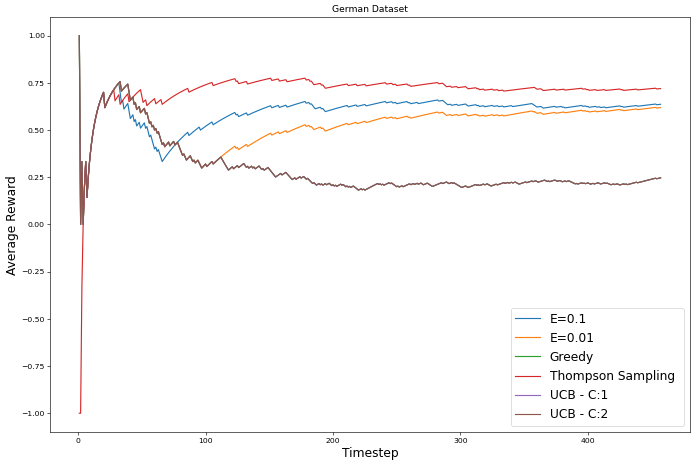

In [46]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(eg['average_reward-0.1'], label="E=0.1")
plt.plot(eg['average_reward-0.01'], label="E=0.01")
plt.plot(g['average_reward'],  label='Greedy')
plt.plot(ts['average_reward'], label='Thompson Sampling ')
plt.plot(ucb['average_reward1'], label='UCB - C:1  ')
plt.plot(ucb['average_reward2'], label='UCB - C:2')

plt.plot(label='Square') 
plt.xlabel('Timestep', fontsize=16)
plt.ylabel('Average Reward', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('German Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [47]:
test2=test
test2=test.drop('Class',axis=1)

In [48]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(train.iloc[:,0:20], train['Class'])
# Predicting the model
pred_logit= logit.predict(test2)

/Users/sarthakgurnani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
lr=pd.DataFrame()
lr['lr_class']=pred_logit
lr["index"] = range(1, len(lr) + 1)
lr = lr.set_index("index")
lr['actual_class']=test['Class']
lr['diff']=lr['actual_class']-lr['lr_class']
lr['pp']=100
lr['pp'] = np.where(lr['pp'] == 1,0, lr['pp'])
lr['pp'] = np.where(lr['diff'] == 1,-10*lr['pp'], lr['pp'] )
lr['lr_profit']=lr['pp'].cumsum()

In [50]:
calp=pd.DataFrame(test['Class'])
calp['Amount']=''
calp['Amount'] = np.where(calp['Class'] == 1,-1000, calp['Amount'] )
calp['Amount'] = np.where(calp['Class'] == 0, 100, calp['Amount'] )
calp['cum_profit']=calp['Amount'].cumsum()

In [51]:
profits=pd.DataFrame()
profits['TS']=testprofitts
profits['TS']=profits['TS'].cumsum()
profits['G']=gprofit
profits['G']=profits['G'].cumsum()
profits['E1']=eprofit1
profits['E1']=profits['E1'].cumsum()
profits['E2']=eprofit1
profits['E2']=profits['E2'].cumsum()
profits['C2']=ucbprofit2
profits['C2']=profits['C2'].cumsum()
profits['C1']=ucbprofit1
profits['C1']=profits['C1'].cumsum()

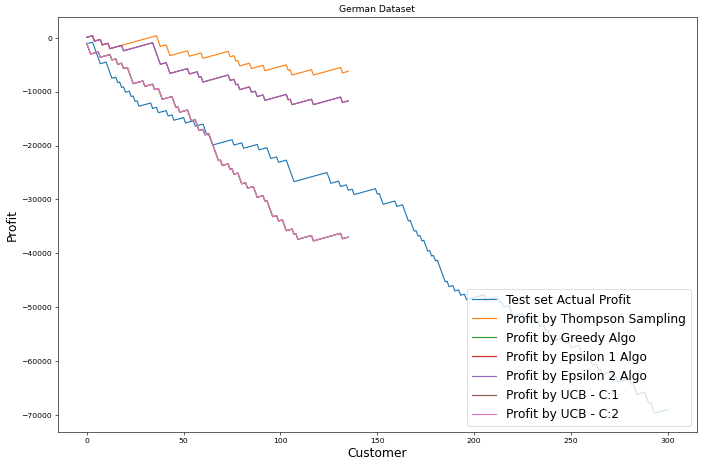

In [55]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(calp['cum_profit'], label="Test set Actual Profit")
plt.plot(profits['TS'], label="Profit by Thompson Sampling")
plt.plot(profits['G'], label="Profit by Greedy Algo")
plt.plot(profits['E1'], label="Profit by Epsilon 1 Algo")
plt.plot(profits['E2'], label="Profit by Epsilon 2 Algo")
plt.plot(profits['C1'], label="Profit by UCB - C:1")
plt.plot(profits['C2'], label="Profit by UCB - C:2")
plt.plot(label='Square') 
plt.xlabel('Customer', fontsize=16)
plt.ylabel('Profit', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('German Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

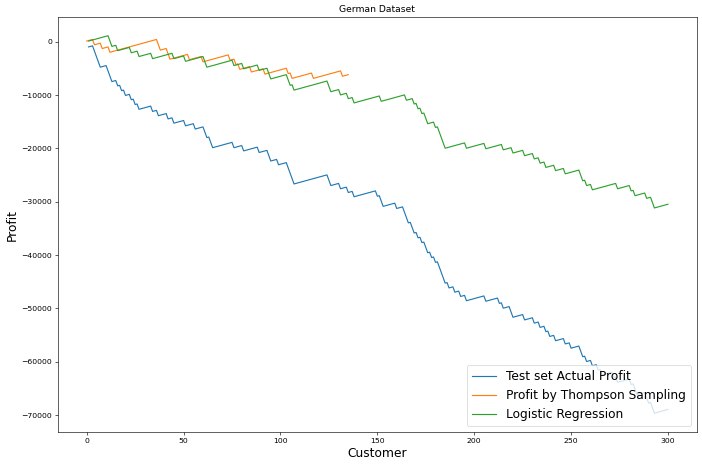

In [56]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(calp['cum_profit'], label="Test set Actual Profit")
plt.plot(profits['TS'], label="Profit by Thompson Sampling")
plt.plot(lr['lr_profit'], label="Logistic Regression")


plt.plot(label='Square') 
plt.xlabel('Customer', fontsize=16)
plt.ylabel('Profit', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('German Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

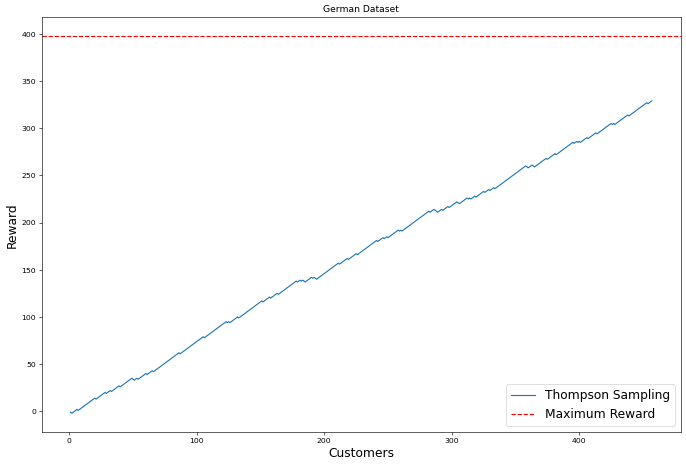

In [52]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(ts['cum_reward'], label="Thompson Sampling")
plt.axhline(y=398, color='r', linestyle='dashed',label="Maximum Reward")
plt.plot(label='Square') 
plt.xlabel('Customers', fontsize=16)
plt.ylabel('Reward', fontsize=16)
plt.title('German Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()